In [1]:
import sys 
sys.path.append('/home/user/')

In [2]:
from pysymmetry_dev01 import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from multiprocessing import Pool

font = {'family' : 'sans-serif', 'size' : 14}
plt.rc('font', **font)
plt.rc('lines', linewidth=2)


In [3]:
def bar_plot(t_process, blocks_plus_process, t_full, labels):    
   
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(15,10))
    rects1 = ax.bar(x ,  blocks_plus_process, width, label='Bocks')
    rects2 = ax.bar(x, t_process, width, label='Preprocessing')
    
    rects3 = ax.bar(x+ width ,t_full , width, label='Full matrix')
    
    ax.set_ylabel('time in seconds')
    ax.set_xlabel('size matrix')
    ax.set_title('Time by algorithm')
    ax.set_xticks(x+ width/2)
    ax.set_xticklabels(labels)
    ax.legend()
    #ax.grid()
    
    
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = round(rect.get_height(),1)
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    autolabel(rects1)
    #autolabel(rects2)
    autolabel(rects3)

    #fig.tight_layout()
    #ig.figure(figsize=(15,10))

    plt.show()
    
    
def generators2d(n):#Nota:temporario

    string_reflexao_sigma = ''
    for j in range(1,(n/2+1).floor()):
        for k in range(0,n):
            string_reflexao_sigma = string_reflexao_sigma + str((k*n+j,k*n+n-j+1))
    
    string_reflexao_miDp = ''
    for i in range(1, n):
        for j in range(i+1, n+1):            
            string_reflexao_miDp = string_reflexao_miDp + str(((i-1)*n+j,(j-1)*n+i))
            
    return [string_reflexao_sigma, string_reflexao_miDp]
    
def eig(m):
    return np.linalg.eigvals(m)
def eigh(m):
    return np.linalg.eigvalsh(m)
    

In [4]:
t = Timer()
s = Timer()

In [5]:
nmin = 60
nmax = 90
step = 5

size = np.arange(nmin, nmax + step, step);

In [6]:
# # Timers
# nmin = 60
# nmax = 90
# step = 5

t_process = []
t_blocks_plus_process = []
t_full = []
for n in size:
    
    M = laplacian2d(n)
    print('n = ' + str(n))
    print('time preprocessing')
    s.start()
    G = nGroup(generators2d(ZZ(n)))
    gens = G.gens()
    img = [g.matrix() for g in gens]
    r = G.nrepresentation(gens, img)
    base = G.nbase_change_reduction(r)
    blocks = base.get_blocks(M)
    tpp = s.stop()
    t_process.append(tpp)
    
    M = M.toarray()
    
    print('times values blocks')
    blocks = [b.toarray() for b in blocks] 
    if __name__ == '__main__':        
        with Pool(3) as p:
            s.start()
            v = [p.apply_async(eig,  args=(b,)) for b in blocks]
            values = [p.get() for p in v]
            tbl = s.stop()
    t_blocks_plus_process.append(tbl + tpp)
    print('values full matrix')
    t.start()
    v = eigh(M)
    tf = t.stop()
    t_full.append(tf)

n = 60
time preprocessing


Elapsed time: 17.2010 seconds
times values blocks


Elapsed time: 1.4766 seconds
values full matrix


Elapsed time: 19.1034 seconds


n = 65
time preprocessing


Elapsed time: 19.2991 seconds
times values blocks


Elapsed time: 2.5130 seconds
values full matrix


Elapsed time: 30.4227 seconds


n = 70
time preprocessing


Elapsed time: 24.2793 seconds
times values blocks


Elapsed time: 3.4091 seconds
values full matrix


Elapsed time: 49.9162 seconds


n = 75
time preprocessing


Elapsed time: 31.3199 seconds
times values blocks


Elapsed time: 5.0984 seconds
values full matrix


Elapsed time: 73.2384 seconds


n = 80
time preprocessing


Elapsed time: 44.4288 seconds
times values blocks


Elapsed time: 6.7353 seconds
values full matrix


Elapsed time: 104.8155 seconds


n = 85
time preprocessing


Elapsed time: 56.6882 seconds
times values blocks


Elapsed time: 9.1884 seconds
values full matrix


Elapsed time: 149.0812 seconds


n = 90
time preprocessing


Elapsed time: 77.5856 seconds
times values blocks


Elapsed time: 13.9809 seconds
values full matrix


Elapsed time: 209.9340 seconds


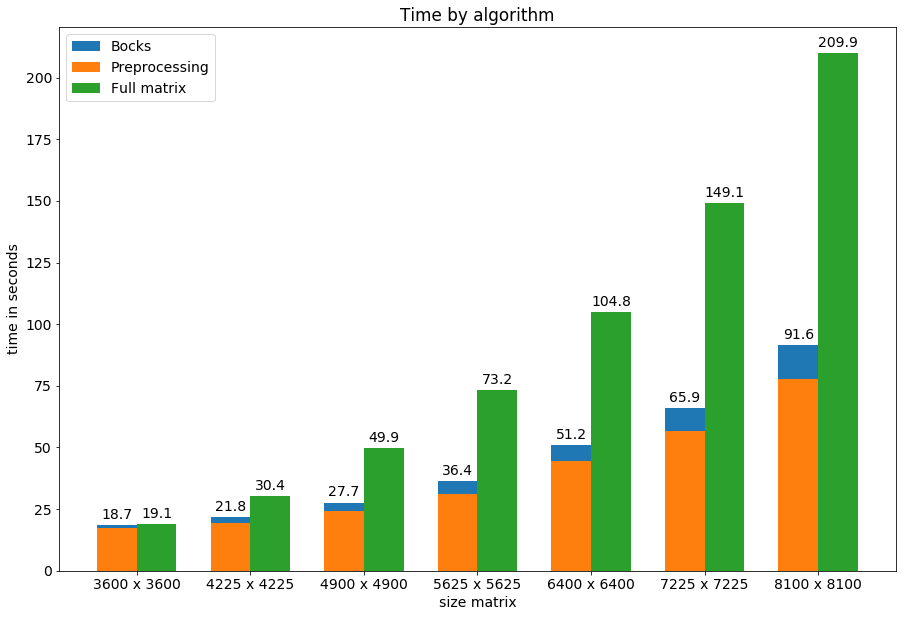

In [7]:
labels = [str(k) + ' x ' + str(k) for k in size**2]
bar_plot(t_process, t_blocks_plus_process, t_full, labels)   

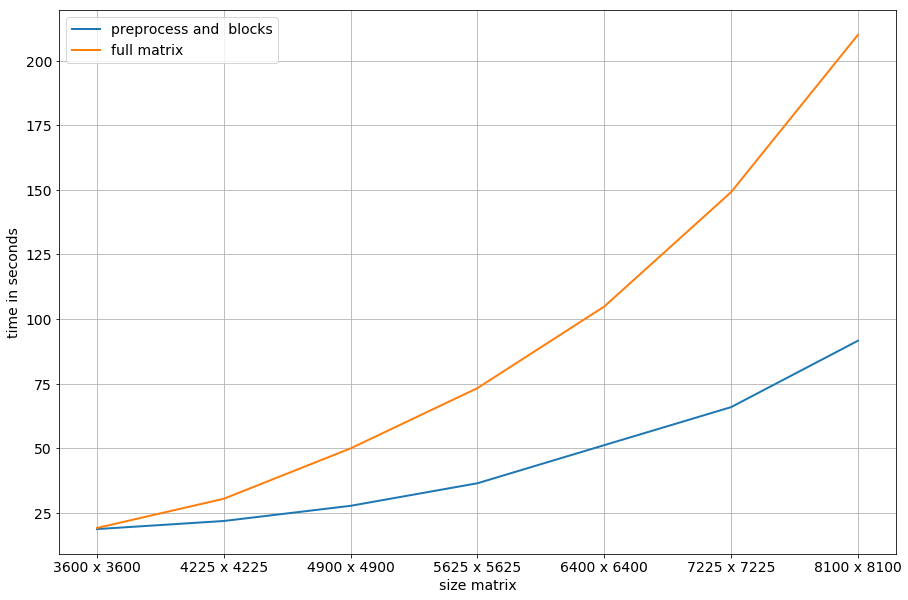

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(labels,t_blocks_plus_process, label ='preprocess and  blocks')
ax.legend()
ax.plot(labels,t_full, label='full matrix')
ax.legend()
ax.set_ylabel('time in seconds')
ax.set_xlabel('size matrix')
ax.grid()
plt.show()